
# Embedded ML - Lab 1.1: Native Implementation of Artificial Neural Networks

**Name:** Cristian David Araujo A.  
**ID:** 1089568350  
**Date:** April 8, 2025


In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn, PyTorch or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some code but you are expected to write some more and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



### 1. Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Below is an incomplete code for a Python class that implements a linear regressor. You should **complete the missing code** for the predict() and error() methods and then write a simple implementation of the class.

Dataset A: 
Output:  [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predictions:  [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Error:  0.0




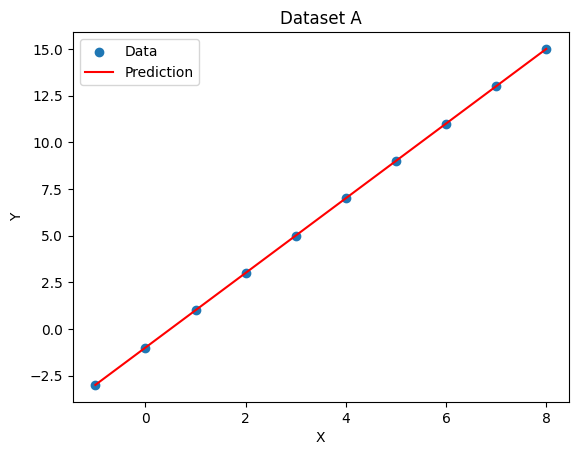

Dataset B: 
Output:  [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
Predictions:  [-17, -11, -7.8, -5, -1, 2.8, 7, 11.4, 15, 22.0]
Error:  77.52207




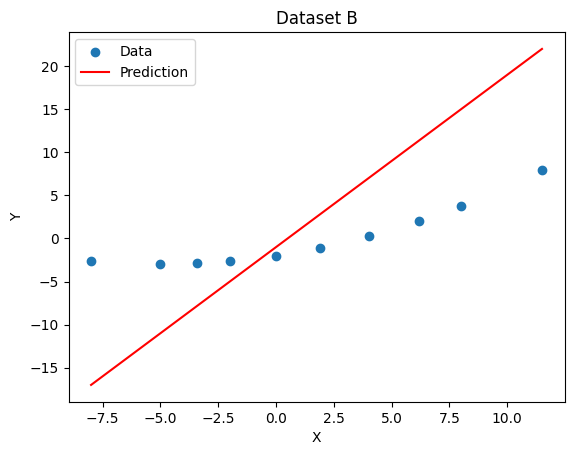

In [9]:
import random

import matplotlib.pyplot as plt
import numpy as np

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    self.myY = []

    # predict all the corresponding Y values from X, using a linear model
    # complete here the missing code...
    for i in range(len(x)):
      self.myY.append(self.w * x[i] + self.b)

    return self.myY

  def error(self, y):
    total_square_error = 0

    # compute the total error using one of the metrics seen
    # complete here the missing code...
    for i in range(len(self.myY)):
      #Squared error
      total_square_error += (y[i] - self.myY[i]) ** 2
    
    #Squared error
    total_square_error /= len(self.myY)

    return total_square_error

datasets = {"A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    }
}

# 1. Assign values to globals w and b
# complete here the missing code...
w = 2
b = -1

# 2. Instantiate the LinRegressor class
# complete here the missing code...
lin_reg = LinRegressor(w, b)

# 3. Perform a prediction using dataset A and B
# complete here the missing code...

dataset = ["A", "B"]

for i in range(len(dataset)):
  print(f"Dataset {dataset[i]}: ")
  x = datasets[dataset[i]]["input"]
  y = datasets[dataset[i]]["output"]

  # Perform the prediction
  lin_reg.predict(x)
  
  # Print output
  print("Output: ", y)

  # Print the predictions
  print("Predictions: ", lin_reg.myY)

  # Print the error
  print("Error: ", lin_reg.error(y))
  print("\n")

  # Plot the data
  plt.scatter(x, y, label="Data")
  plt.plot(x, lin_reg.myY, label="Prediction", color="red")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(f"Dataset {dataset[i]}")
  plt.legend()
  plt.show()




Measure the error for three different sets of parameter values, for each dataset. **Plot the datasets against the predictions** and analyze the model results obtained.

*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?

### Questions & Answers

**1. Can the error of Dataset A be zero?**  
Yes. Dataset A follows a perfect linear relationship, and a linear model with the right parameters (e.g., `y = 2x - 1`) can predict the outputs exactly. In such cases, the error can be exactly zero.


**2. Can the error of Dataset B be zero?**  
No, not with a simple linear model. Dataset B appears to follow a non-linear trend. Since linear models can only fit straight-line relationships, they can't perfectly match non-linear patterns. Therefore, the error cannot be zero unless a more complex model (e.g., polynomial, exponential, or neural network) is used.


**3. Does zero error mean that the model represents the system perfectly?**  
For the given dataset, yes — a zero error means the model reproduces all output values exactly.  
However, this does **not always** mean the model generalizes well beyond the data. It could overfit or only work for the limited range of observed values. So while it represents the data perfectly, it doesn't guarantee it represents the entire underlying system.


**4. Can you model any kind of system with this type of model?**  
No. A linear model can only represent systems with linear relationships. Many real-world systems are non-linear, involving curves, interactions, or conditional logic. To model those systems accurately, you need more flexible modeling techniques (e.g., polynomial regression, neural networks, or ensemble models).

### 2. Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a Python code that partially implements a neural network with three layers: input, hidden and output. It defines methods for training and inference and uses the XOR function as a test case.

Study the code to get familiar with it and **complete the implementation of the forward()** method that takes in the network inputs to produce the outputs.
Verify the network works by running the code and observing the error going down and producing corrects results. Also play with the training parameters to see how learning improves or degrades.

Then mode to **implementing the my_dot() method to replace NumPy's dot()**, in order to make explicit the operations that are executed every time the method is called. Modify the forward method to use the new function and verify its correctness.

In [10]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def my_dot(self, A, B):
        # dot product
        # complete here the missing code...

        # Check if A is 1D and reshape it to 2D for consistency
        if A.ndim == 1:
            A = A.reshape(1, -1)

        # Initialize the result matrix with zeros
        result = np.zeros((A.shape[0], B.shape[1]))
        for i in range(A.shape[0]):
            for j in range(B.shape[1]):
                for k in range(A.shape[1]):
                    result[i, j] += A[i, k] * B[k, j]
        return result
    

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network...

        # Step 1: dot product between the input and the weights
        # that connect with the hidden layer.
        # complete here the missing code...

        self.hidden_input = self.my_dot(x, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        

        # Step 2: dot product between the activations (outputs) of the
        # hidden layer and the weights that connect with the output layer.
        # complete here the missing code...

        self.final_input =  self.my_dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.sigmoid(self.final_input)
        
        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.5)

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Epoch 0: Loss = 0.3785
Epoch 100: Loss = 0.2408
Epoch 200: Loss = 0.2147
Epoch 300: Loss = 0.1664
Epoch 400: Loss = 0.0883
Epoch 500: Loss = 0.0379
Epoch 600: Loss = 0.0204
Epoch 700: Loss = 0.0132
Epoch 800: Loss = 0.0095
Epoch 900: Loss = 0.0073

Test the trained model:
Input: [0 0], Predicted Output: [[0.05017547]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.92021734]], Actual Output: [1]
Input: [1 0], Predicted Output: [[0.92165316]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.0930682]], Actual Output: [0]


Let's define an abstraction in which basic computations are: additions, subtractions, multiplications, divisions or computing an activation fuction such as the sigmoid or its derivative. Then, analyze the code in detail to answer the following questions:

*   How many scalar basic computations are requiered for one forward pass, for one training iteration and for a complete training process?
*   Which are the newtwork parameters that determine the amount of computations required?

**Write a formula** that gives the amount of basic scalar computations depending on the network parameters.

### Network Parameters

Let:
- **I** = Number of input neurons  
- **H** = Number of hidden neurons  
- **O** = Number of output neurons  
- **N** = Number of training samples  
- **E** = Number of epochs  

---

#### 1. Basic Computations in One Forward Pass

**Input → Hidden Layer**  
For each hidden neuron:
- Weighted sum: **I** multiplications + (**I - 1**) additions  
- Bias addition: 1 addition  
- Activation (sigmoid): 1 operation  

Per hidden neuron: **I multiplications + I additions + 1 sigmoid**  
Total for all hidden neurons:  
**Hidden_Comp = H × (2I + 1)** basic operations  

**Hidden → Output Layer**  
For each output neuron:
- Weighted sum: **H** multiplications + (**H - 1**) additions  
- Bias addition: 1 addition  
- Activation (sigmoid): 1 operation  

Per output neuron: **H multiplications + H additions + 1 sigmoid**  
Total for all output neurons:  
**Output_Comp = 2H + 2**  

**Total Forward Pass:**  
**Forward(I, H) = 2IH + 3H + 2** basic operations  

---

#### 2. Backward Pass (Backpropagation)

- Output error: 1 subtraction  
- Sigmoid derivative: 1 operation  
- Delta: 1 multiplication  
- Gradients w.r.t. output weights: **H** multiplications  
- Hidden error: **H** multiplications + **H** sigmoid derivatives  
- Gradients w.r.t. hidden weights: **H × I** multiplications  

**Total Backward Pass (approximate):**  
**Backward(I, H) = IH + 3H + 1** basic operations  

---

#### 3. Parameter Updates

Weights and biases:
- Input → Hidden: **I × H weights + H biases**  
- Hidden → Output: **H weights + 1 bias**  

Each parameter update = 1 multiplication + 1 subtraction = **2 operations**  
Total parameters = **I × H + 2H + 1**  

**Total Update Computations:**  
**Updates(I, H) = 2 × (I × H + 2H + 1) = 2IH + 4H + 2**  

---

#### 4. Total Computations per Training Iteration

**Iteration(I, H) = Forward + Backward + Updates**  
**Iteration(I, H) = (2IH + 3H + 2) + (IH + 3H + 1) + (2IH + 4H + 2)**  
**Iteration(I, H) = 5IH + 10H + 5** basic operations  

---

#### 5. Total Computations for Full Training Process

Let **N** = Number of training samples, **E** = Number of epochs  

**Total(I, H, N, E) = E × N × Iteration(I, H)**  
**Total(I, H, N, E) = E × N × (5IH + 10H + 5)**  

---


### 3. Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, it can lead to a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the **MNIST dataset**. Investigate how to obtain the dataset and how to prepare a proper partition between training and test.

The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). **Configure and test at least five versions of the model** by varying the amount of neurons in the hidden layer.

Make a table or a plot to report the following for each model:

*   Number of model parameters
*   Number of basic scalar computations for a forward pass (using the previously created formula)
*   Execution time for training and for a forward pass
*   Model's Top-1 accuracy.

In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# === NeuralNetwork class ===
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)* 0.01
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)* 0.01
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def my_dot(self, A, B):
        # dot product
        # complete here the missing code...

        # Check if A is 1D and reshape it to 2D for consistency
        if A.ndim == 1:
            A = A.reshape(1, -1)

        # Initialize the result matrix with zeros
        result = np.zeros((A.shape[0], B.shape[1]))
        for i in range(A.shape[0]):
            for j in range(B.shape[1]):
                for k in range(A.shape[1]):
                    result[i, j] += A[i, k] * B[k, j]
        return result
    

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network...

        # Step 1: dot product between the input and the weights
        # that connect with the hidden layer.
        # complete here the missing code...

        self.hidden_input = self.my_dot(x, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        

        # Step 2: dot product between the activations (outputs) of the
        # hidden layer and the weights that connect with the output layer.
        # complete here the missing code...

        self.final_input =  self.my_dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.sigmoid(self.final_input)
        
        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 10 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')
        print(f'Epoch {epochs}: Loss = {error:.4f} ')


# === Load and preprocess MNIST dataset ===
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_data = mnist.data / 255.0
y_data = mnist.target.astype(np.int32)

# Reduce dataset size for faster training
X_data = X_data[:300]
y_data = y_data[:300]

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_data_encoded = encoder.fit_transform(y_data.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_encoded, test_size=0.1, random_state=42)

# === Run experiments with different hidden layer sizes ===
hidden_sizes = [4, 8, 16, 32, 64]
results = []

# Define parameters

 #Number of features (28*28=784)
input_size = X_train.shape[1]
# Number of classes (0-9 digits)
output_size = 10
# Number of epochs
epochs = 200
# Learning rate
learning_rate = 0.05

for h_size in hidden_sizes:
    print(f"\nTraining model with {h_size} hidden neurons...")
    nn = NeuralNetwork(input_size=input_size, hidden_size=h_size, output_size=output_size)

    start_train = time.time()
    nn.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate)
    end_train = time.time()

    # Time one forward pass
    start_forward = time.time()
    output = nn.forward(X_test[:1])
    end_forward = time.time()

    # Predict and evaluate accuracy
    predictions = np.argmax(nn.forward(X_test), axis=1)
    print("Predictions: ", predictions)

    labels = np.argmax(y_test, axis=1)
    print("Labels: ", labels)
    accuracy = np.mean(predictions == labels) * 100
    
    # Count parameters and forward operations
    param_count = (2 * input_size * h_size) + (2 * h_size * output_size) + (h_size + output_size)
    forward_ops = 2*input_size*h_size + 3*h_size + 2

    results.append({
        "Hidden Neurons": h_size,
        "Parameters": param_count,
        "Forward Ops": forward_ops,
        "Training Time (s)": round(end_train - start_train, 2),
        "Forward Time (ms)": round((end_forward - start_forward) * 1000, 2),
        "Accuracy (%)": round(accuracy, 2)
    })



Loading MNIST dataset...

Training model with 4 hidden neurons...
Epoch 0: Loss = 0.2506
Epoch 10: Loss = 0.0897
Epoch 20: Loss = 0.0886
Epoch 30: Loss = 0.0829
Epoch 40: Loss = 0.0761
Epoch 50: Loss = 0.0717
Epoch 60: Loss = 0.0693
Epoch 70: Loss = 0.0668
Epoch 80: Loss = 0.0643
Epoch 90: Loss = 0.0605
Epoch 100: Loss = 0.0589
Epoch 110: Loss = 0.0550
Epoch 120: Loss = 0.0508
Epoch 130: Loss = 0.0486
Epoch 140: Loss = 0.0454
Epoch 150: Loss = 0.0428
Epoch 160: Loss = 0.0646
Epoch 170: Loss = 0.0401
Epoch 180: Loss = 0.0378
Epoch 190: Loss = 0.0411
Epoch 200: Loss = 0.0411 
Predictions:  [3 2 1 4 2 9 7 6 2 2 4 9 6 9 2 6 4 1 6 6 1 1 0 6 1 7 3 2 3 6]
Labels:  [3 5 1 4 2 9 7 2 2 5 4 9 6 9 5 6 4 1 7 6 1 1 0 3 1 7 3 8 3 6]

Training model with 8 hidden neurons...
Epoch 0: Loss = 0.2511
Epoch 10: Loss = 0.0909
Epoch 20: Loss = 0.0891
Epoch 30: Loss = 0.0853
Epoch 40: Loss = 0.0794
Epoch 50: Loss = 0.0726
Epoch 60: Loss = 0.0702
Epoch 70: Loss = 0.0670
Epoch 80: Loss = 0.0620
Epoch 90: Loss =

In [14]:
# === Display results table ===
df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(df.to_string(index=False))


Model Comparison Table:
 Hidden Neurons  Parameters  Forward Ops  Training Time (s)  Forward Time (ms)  Accuracy (%)
              4        6366         6286             102.28               2.56         76.67
              8       12722        12570             188.95               0.00         80.00
             16       25434        25138             392.20              11.86         86.67
             32       50858        50274             748.81              14.75          3.33
             64      101706       100546            1527.27              37.80         16.67
